In [ ]:
import pandas as pd
import requests
import io

url = 'https://drive.google.com/file/d/1Y7wnEA_dmOvJzfqJQuRRm3b0ahHCRTGE/view?usp=sharing'
file_id = url.split('/')[-2]
download_url = f'https://drive.google.com/uc?id={file_id}'

# Bypass SSL certificate verification
response = requests.get(download_url, verify=False)

# Create a file-like object from the response content
csv_data = io.BytesIO(response.content)

# Read the CSV data into a DataFrame
df = pd.read_csv(csv_data)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'drive.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'doc-08-bo-docs.googleusercontent.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [ ]:
df.head()

,id,username,full_name,profile_pic_url,is_verified,is_private,followed_by_viewer,requested_by_viewer,biography,public_email,contact_phone_number,follower_count,following_count,media_count,automation,profile_url
0,473326661,proteasen,NaN,https://scontent-xsp1-2.cdninstagram.com/v/t51...,False,True,False,False,jensen :),NaN,NaN,308,726,3,NaN,https://www.instagram.com/proteasen
1,4746306380,okaylahs,‍,https://scontent-xsp1-2.cdninstagram.com/v/t51...,False,True,False,False,"kay, mildly unfiltered. 🐈‍⬛",NaN,NaN,56,1538,2692,NaN,https://www.instagram.com/okaylahs
2,53869471602,licorice_radiata,悲願花,https://scontent-xsp1-1.cdninstagram.com/v/t51...,False,True,False,False,NaN,NaN,NaN,0,487,0,NaN,https://www.instagram.com/licorice_radiata
3,15883569,hoyuyan,何雨嫣 | 호유얜,https://scontent-xsp1-1.cdninstagram.com/v/t51...,False,True,False,False,Eating @fatfisheats,NaN,NaN,450,540,135,NaN,https://www.instagram.com/hoyuyan
4,4588284365,jay.jelly_,JayJay~♡,https://scontent-xsp1-2.cdninstagram.com/v/t51...,False,True,False,False,EGGY 😩🎶✨\nNP🎓\nHS NSG Y3💞🍀💉\nBMSJ♡👀,NaN,NaN,691,2619,4,NaN,https://www.instagram.com/jay.jelly_


Prepping the CSV file
Dropping all columns which are unnecessary and don't provide any valuable insights
is_verified only has 1 True value, brasbasahbugis. Because no real conclusions can be inferred from one entry I decided to drop this one too.

In [ ]:
new_df = df.drop(['full_name', 'profile_pic_url', 'is_private', 'biography', 'public_email', 'contact_phone_number', 'requested_by_viewer', 'automation', 'followed_by_viewer', 'is_verified'], axis=1)
new_df.head()

,id,username,follower_count,following_count,media_count,profile_url
0,473326661,proteasen,308,726,3,https://www.instagram.com/proteasen
1,4746306380,okaylahs,56,1538,2692,https://www.instagram.com/okaylahs
2,53869471602,licorice_radiata,0,487,0,https://www.instagram.com/licorice_radiata
3,15883569,hoyuyan,450,540,135,https://www.instagram.com/hoyuyan
4,4588284365,jay.jelly_,691,2619,4,https://www.instagram.com/jay.jelly_


Looking at some individual datapoints, and checking whether some colums can be dropped as well if they don't provide significant value

In [ ]:
# print(df['followed_by_viewer'].sum(), df['is_verified'].sum(), df['automation'].notnull().sum())
print(new_df[new_df['is_verified']==True])
follower_count = new_df.sort_values(by=['follower_count'], ascending=False)
follower_count.head()

           id        username  is_verified  follower_count  following_count  \
63  238818760  brasbasahbugis         True            3219              922   

    media_count                               profile_url  
63         1285  https://www.instagram.com/brasbasahbugis  


,id,username,is_verified,follower_count,following_count,media_count,profile_url
85,57270906533,tgi_5_8,False,25769,1498,166,https://www.instagram.com/tgi_5_8
618,456239450,the_xw,False,19946,6272,5825,https://www.instagram.com/the_xw
468,49658050536,house_no_6,False,19595,708,103,https://www.instagram.com/house_no_6
256,30285034765,mr.ninja_kit,False,17966,1653,717,https://www.instagram.com/mr.ninja_kit
99,269448684,thejonnieboy,False,9186,3875,36,https://www.instagram.com/thejonnieboy


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'follower_count'}>],
       [<Axes: title={'center': 'following_count'}>,
        <Axes: title={'center': 'media_count'}>]], dtype=object)

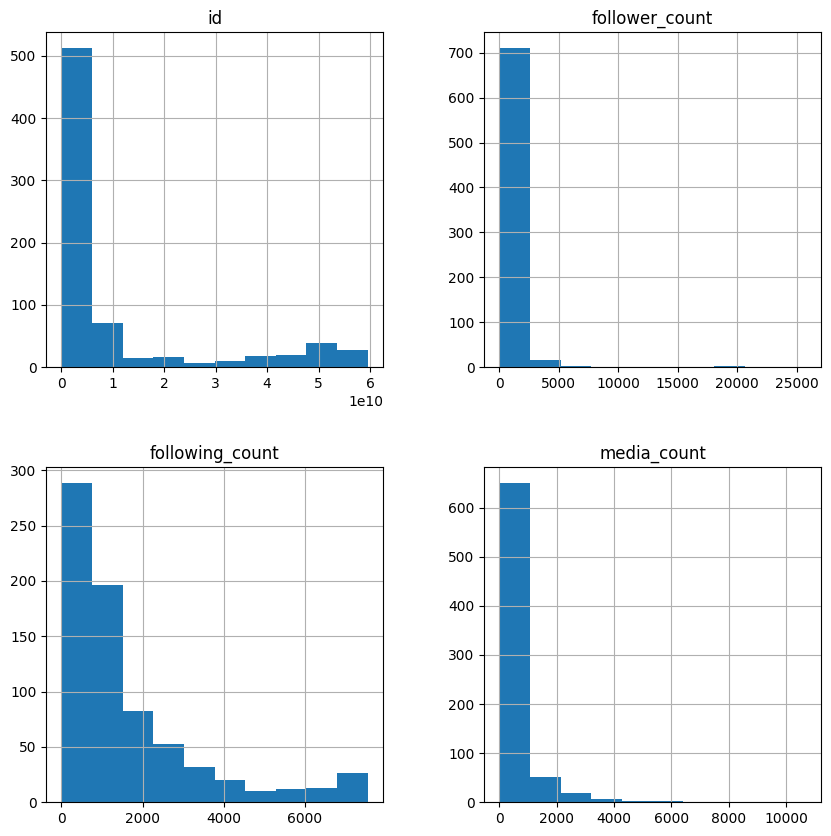

In [ ]:
new_df.hist(figsize=(10,10))